In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
data = np.load('data.npy')

In [3]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target) 
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

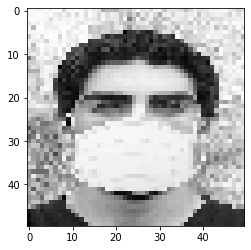

In [4]:
plt.imshow(data[890],cmap='gray')

In [5]:
target[890]

array([0., 1.], dtype=float32)

In [6]:

odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) 
    image = tf.convert_to_tensor(image) 
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.shape(data)

(1651, 50, 50, 3)

In [9]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [10]:
trainy.shape

(1403, 2)

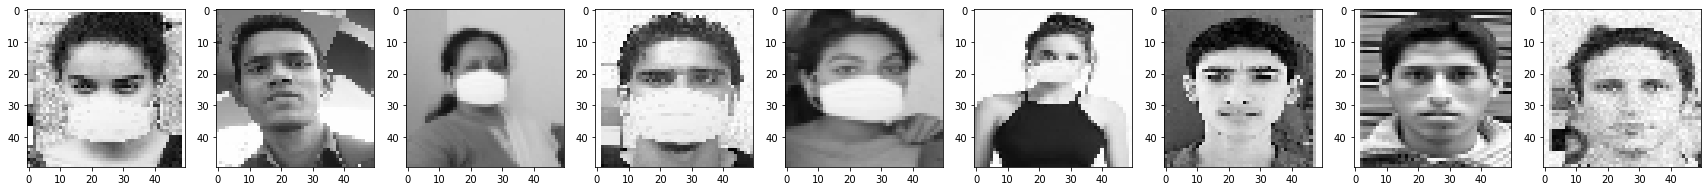

In [11]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

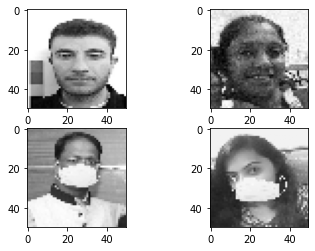

In [12]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [13]:
trainy[0]

array([0., 1.], dtype=float32)

In [14]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [15]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 activation (Activation)     (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         7

In [17]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/50
12/12 - 3s - loss: 0.6840 - accuracy: 0.5499 - val_loss: 0.6544 - val_accuracy: 0.5907 - 3s/epoch - 252ms/step
Epoch 2/50
12/12 - 2s - loss: 0.5976 - accuracy: 0.6845 - val_loss: 0.4605 - val_accuracy: 0.7865 - 2s/epoch - 173ms/step
Epoch 3/50
12/12 - 2s - loss: 0.3990 - accuracy: 0.8369 - val_loss: 0.4332 - val_accuracy: 0.8221 - 2s/epoch - 175ms/step
Epoch 4/50
12/12 - 2s - loss: 0.3233 - accuracy: 0.8717 - val_loss: 0.2500 - val_accuracy: 0.9217 - 2s/epoch - 179ms/step
Epoch 5/50
12/12 - 2s - loss: 0.2716 - accuracy: 0.8984 - val_loss: 0.2187 - val_accuracy: 0.9110 - 2s/epoch - 180ms/step
Epoch 6/50
12/12 - 2s - loss: 0.2360 - accuracy: 0.9171 - val_loss: 0.3045 - val_accuracy: 0.8683 - 2s/epoch - 181ms/step
Epoch 7/50
12/12 - 2s - loss: 0.2334 - accuracy: 0.9091 - val_loss: 0.1586 - val_accuracy: 0.9359 - 2s/epoch - 184ms/step
Epoch 8/50
12/12 - 2s - loss: 0.1972 - accuracy: 0.9242 - val_loss: 0.1390 - val_accuracy: 0.9537 - 2s/epoch - 192ms/step
Epoch 9/50
12/12 - 2s - 

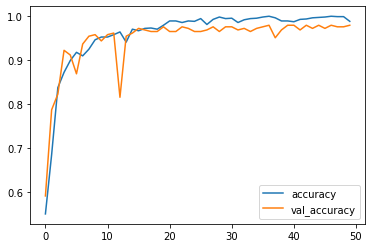

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [19]:
model.evaluate(testx, testy)

8/8 [==============================] - 0s 26ms/step - loss: 0.1942 - accuracy: 0.9516


[0.19423644244670868, 0.9516128897666931]

In [20]:
model.save('cnn.h5')